In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marriage.csv', header=None)
df.shape

(170, 55)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


In [4]:
x=df.iloc[:, 0:2]
y=df.iloc[:, 54]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
#Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [6]:
y_pred = NB_model.predict(x_test)
NB_accu = accuracy_score(y_test, y_pred)*100
NB_accu

91.17647058823529

In [7]:
#Logistic Regression model
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [8]:
LR_accu = LR_model.score(x_test, y_test)*100
LR_accu

91.17647058823529

In [9]:
#KNN model
scores = {}
for k in range(1, 26):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    scores[k] = accuracy_score(y_test, y_pred)

maximum = max(scores, key=scores.get)  
print('k=',maximum, 'KNN_accu=',scores[maximum])
    


k= 6 KNN_accu= 0.9411764705882353


In [10]:
knn_model = KNeighborsClassifier(n_neighbors=maximum)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [11]:
#SVM model
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(x_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = SVM_model.predict(x_test)
SVM_accu = accuracy_score(y_test, y_pred)*100
SVM_accu

91.17647058823529

In [13]:
# neural network model
NN_model = MLPClassifier(hidden_layer_sizes=(5, 2),activation='logistic',max_iter=2000,random_state=1).fit(x_train, y_train)
NN_model.score(x_test, y_test)

0.9117647058823529

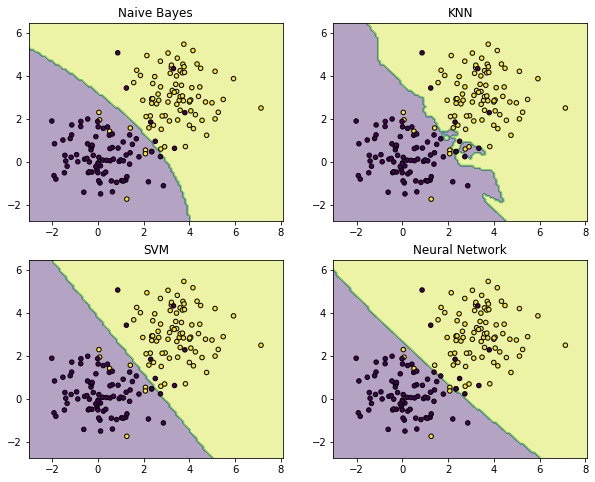

In [15]:
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, figsize=(10, 8))

for idx, clf, tt in zip([(0,0), (0,1), (1,0), (1,1)],
                        [NB_model, knn_model, SVM_model, NN_model],
                        ['Naive Bayes', 'KNN', 'SVM', 'Neural Network']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x.iloc[:, 0], x.iloc[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()